# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC 
from sklearn.multiclass import OneVsOneClassifier

In [2]:
# Your code here
data = pd.read_csv('data_all.csv')
data.head(10)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x=data.e.unique()
x =list(x)
print(sorted(x))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0]


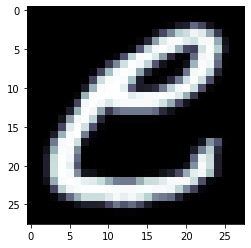

In [4]:
image = np.array(data.iloc[6,1:])
plt.imshow(image.reshape(28, 28), cmap=plt.cm.bone)

In [5]:
for i in range(10,36):
    print(chr(int(i - 10 + 65)))


A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [6]:
def labels(e):
    if e < 10:
        return 'number'
    elif e < 36:
        return 'uppercase'
    else:
        return 'lowercase'

In [7]:
data['Type'] = data['e'].apply(labels)

In [8]:
data.head()

,e,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,Type
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lowercase
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,number
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,number
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,uppercase
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,uppercase


In [9]:
data_dummies = pd.concat([data, pd.get_dummies(data)], axis = 1).drop('e', axis = 1)
data_dummies

,1,2,3,4,5,6,7,8,9,10,...,778,779,780,781,782,783,784,Type_lowercase,Type_number,Type_uppercase
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
116318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
116319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [18]:
models = [LogisticRegression(), DecisionTreeClassifier(max_depth=5), GaussianNB(), RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0), OneVsOneClassifier(LinearSVC(random_state=0, max_iter=4000)), KNeighborsClassifier(n_neighbors=4)]
model_label = ['LogisticRegression', 'DecisionTreeClassifier', 'GaussianNB', 'RandomForestClassifier', 'SVM', 'KNeighborsClassifier']

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [11]:
x = data_dummies.drop(['Type','Type_lowercase', 'Type_number','Type_uppercase'], axis = 1)
y_upper = data_dummies['Type_uppercase']
y_lower = data_dummies['Type_lowercase']
y_number = data_dummies['Type_number']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y_upper, test_size = 0.2)

In [13]:
# Your code here
for i, model in enumerate(models):
    md = model
    md.fit(x_train, y_train)
    y_pred = md.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('-'*50)
    print(model_label[i])
    print(f'Accuracy score: {accuracy}')
    print(confusion_matrix(y_test, y_pred))


/Users/chemaramos/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------
LogisticRegression
Accuracy score: 0.7489361702127659
[[15812  1201]
 [ 4640  1612]]
--------------------------------------------------
DecisionTreeClassifier
Accuracy score: 0.7535353535353535
[[15791  1222]
 [ 4512  1740]]
--------------------------------------------------
KNeighborsClassifier
Accuracy score: 0.848441865463142
[[16118   895]
 [ 2631  3621]]
--------------------------------------------------
GaussianNB
Accuracy score: 0.7440361057382334
[[16555   458]
 [ 5497   755]]
--------------------------------------------------
RandomForestClassifier
Accuracy score: 0.7429615301955728
[[16936    77]
 [ 5903   349]]
--------------------------------------------------
SVM
Accuracy score: 0.6727272727272727
[[13184  3829]
 [ 3785  2467]]


/Users/chemaramos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


* Try to do the same thing with lowercases.

In [20]:
# Your code here
x_train, x_test, y_train, y_test = train_test_split(x, y_lower, test_size = 0.2)
for i, model in enumerate(models):
    md = model
    md.fit(x_train, y_train)
    y_pred = md.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('-'*50)
    print(model_label[i])
    print(f'Accuracy score: {accuracy}')
    print(confusion_matrix(y_test, y_pred))
print('-'*50)


/Users/chemaramos/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------
LogisticRegression
Accuracy score: 0.8119492800343864
[[16857   980]
 [ 3395  2033]]
--------------------------------------------------
DecisionTreeClassifier
Accuracy score: 0.7900279389641092
[[17134   703]
 [ 4182  1246]]
--------------------------------------------------
GaussianNB
Accuracy score: 0.26830002149151083
[[  924 16913]
 [  110  5318]]
--------------------------------------------------
RandomForestClassifier
Accuracy score: 0.7755426606490436
[[17818    19]
 [ 5203   225]]


/Users/chemaramos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


--------------------------------------------------
SVM
Accuracy score: 0.7472598323662153
[[15478  2359]
 [ 3521  1907]]
--------------------------------------------------
KNeighborsClassifier
Accuracy score: 0.8839028583709435
[[17257   580]
 [ 2121  3307]]
--------------------------------------------------


* Try to do the same thing with numbers.

In [19]:
# Your code here
x_train, x_test, y_train, y_test = train_test_split(x, y_number, test_size = 0.2)
for i, model in enumerate(models):
    md = model
    md.fit(x_train, y_train)
    y_pred = md.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)    
    print('-'*50)
    print(model_label[i])
    print(f'Accuracy score: {accuracy}')
    print(confusion_matrix(y_test, y_pred))
print('-'*50)


/Users/chemaramos/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------
LogisticRegression
Accuracy score: 0.7324306898774984
[[8238 3455]
 [2770 8802]]
--------------------------------------------------
DecisionTreeClassifier
Accuracy score: 0.7318289275736084
[[8381 3312]
 [2927 8645]]
--------------------------------------------------
GaussianNB
Accuracy score: 0.5446808510638298
[[ 1493 10200]
 [  393 11179]]
--------------------------------------------------
RandomForestClassifier
Accuracy score: 0.7412422093273157
[[8446 3247]
 [2773 8799]]


/Users/chemaramos/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


--------------------------------------------------
SVM
Accuracy score: 0.6217494089834515
[[8282 3411]
 [5389 6183]]
--------------------------------------------------
KNeighborsClassifier
Accuracy score: 0.8718246292714378
[[10461  1232]
 [ 1750  9822]]
--------------------------------------------------
